In [3]:
import os
# Hack to import outside folder 
import sys
sys.path.append(os.path.abspath(os.path.join('..')))

from midiDataHandler import MidiDataHandler
import random
import torch as torch
import numpy as np
import pandas as pd

# Create an instance of the MidiDataHandler class
handler = MidiDataHandler()



In [5]:

# Set the midi folder path
midi_folder_path = "../midi_files/piano"


# Set the number of random files to process
num_files = 220
num_sequences_per_file = 10

# Initialize an empty DataFrame
data = pd.DataFrame()

for _ in range(num_files):
    # Set the file path
    file_name = random.choice(os.listdir(midi_folder_path))
    file_path = os.path.join(midi_folder_path, file_name)

    # Call the read_midi_file method and print the result
    result = handler.read_midi_file(file_path)

    print("\nfilename:", file_name)

    for _ in range(num_sequences_per_file):
        try:
            pairOfNote = handler.get_pair_of_notes_from_random(file_path, 5, 1)
        except ValueError as e:
            print("Error:", e)
            break
        print("Random note pairs as midi\n", 
            "first note sequence:\t",pairOfNote[0], 
            "\n second note sequence:\t", pairOfNote[1])
        
        # Convert the pair of notes to a DataFrame
        df = pd.DataFrame({
            'feature': [pairOfNote[0]],
            'label': [pairOfNote[1]]
        })
        
        # Append the DataFrame to the data
        data = pd.concat([data, df], ignore_index=True)

# Save the data to a CSV file
data.to_csv("test.csv", index=False)

#print("midi file:", file_path)
#print("Tempo:", handler.get_tempo(file_path))
#print("Time signature:", handler.get_time_signature(file_path))
#print("0 Index notes: ", handler.midi_notes_to_piano(handler.get_notes_from_index(file_path, 0, 5)))
#print("Random index notes: ", handler.midi_notes_to_piano(handler.get_notes_from_random(file_path, 5)))
# Create an empty DataFrame to store the features and labels
#print("Random Pair notes as piano keys: ", handler.midi_notes_to_piano(pairOfNote[0]), handler.midi_notes_to_piano(pairOfNote[1]))
#print("Dataset pair notes: ", handler.dataset_pair(file_path, 5))


filename: WWIntroPiano.mid
Error: Invalid number of tracks in the MIDI file

filename: adventures_of_link-house.mid
Random note pairs as midi
 first note sequence:	 [65, 72, 76, 65, 72] 
 second note sequence:	 [76, 65, 72, 77, 65]
Random note pairs as midi
 first note sequence:	 [69, 72, 65, 69, 72] 
 second note sequence:	 [65, 72, 76, 65, 72]
Random note pairs as midi
 first note sequence:	 [65, 69, 72, 65, 69] 
 second note sequence:	 [72, 62, 67, 71, 62]
Random note pairs as midi
 first note sequence:	 [65, 72, 76, 65, 72] 
 second note sequence:	 [76, 65, 71, 74, 65]
Random note pairs as midi
 first note sequence:	 [74, 67, 71, 67, 71] 
 second note sequence:	 [62, 67, 62, 67, 65]
Random note pairs as midi
 first note sequence:	 [67, 71, 62, 67, 71] 
 second note sequence:	 [69, 72, 69, 72, 71]
Random note pairs as midi
 first note sequence:	 [72, 76, 67, 71, 74] 
 second note sequence:	 [67, 71, 74, 67, 71]
Random note pairs as midi
 first note sequence:	 [65, 69, 65, 67, 71] 


<Figure size 1000x1000 with 0 Axes>

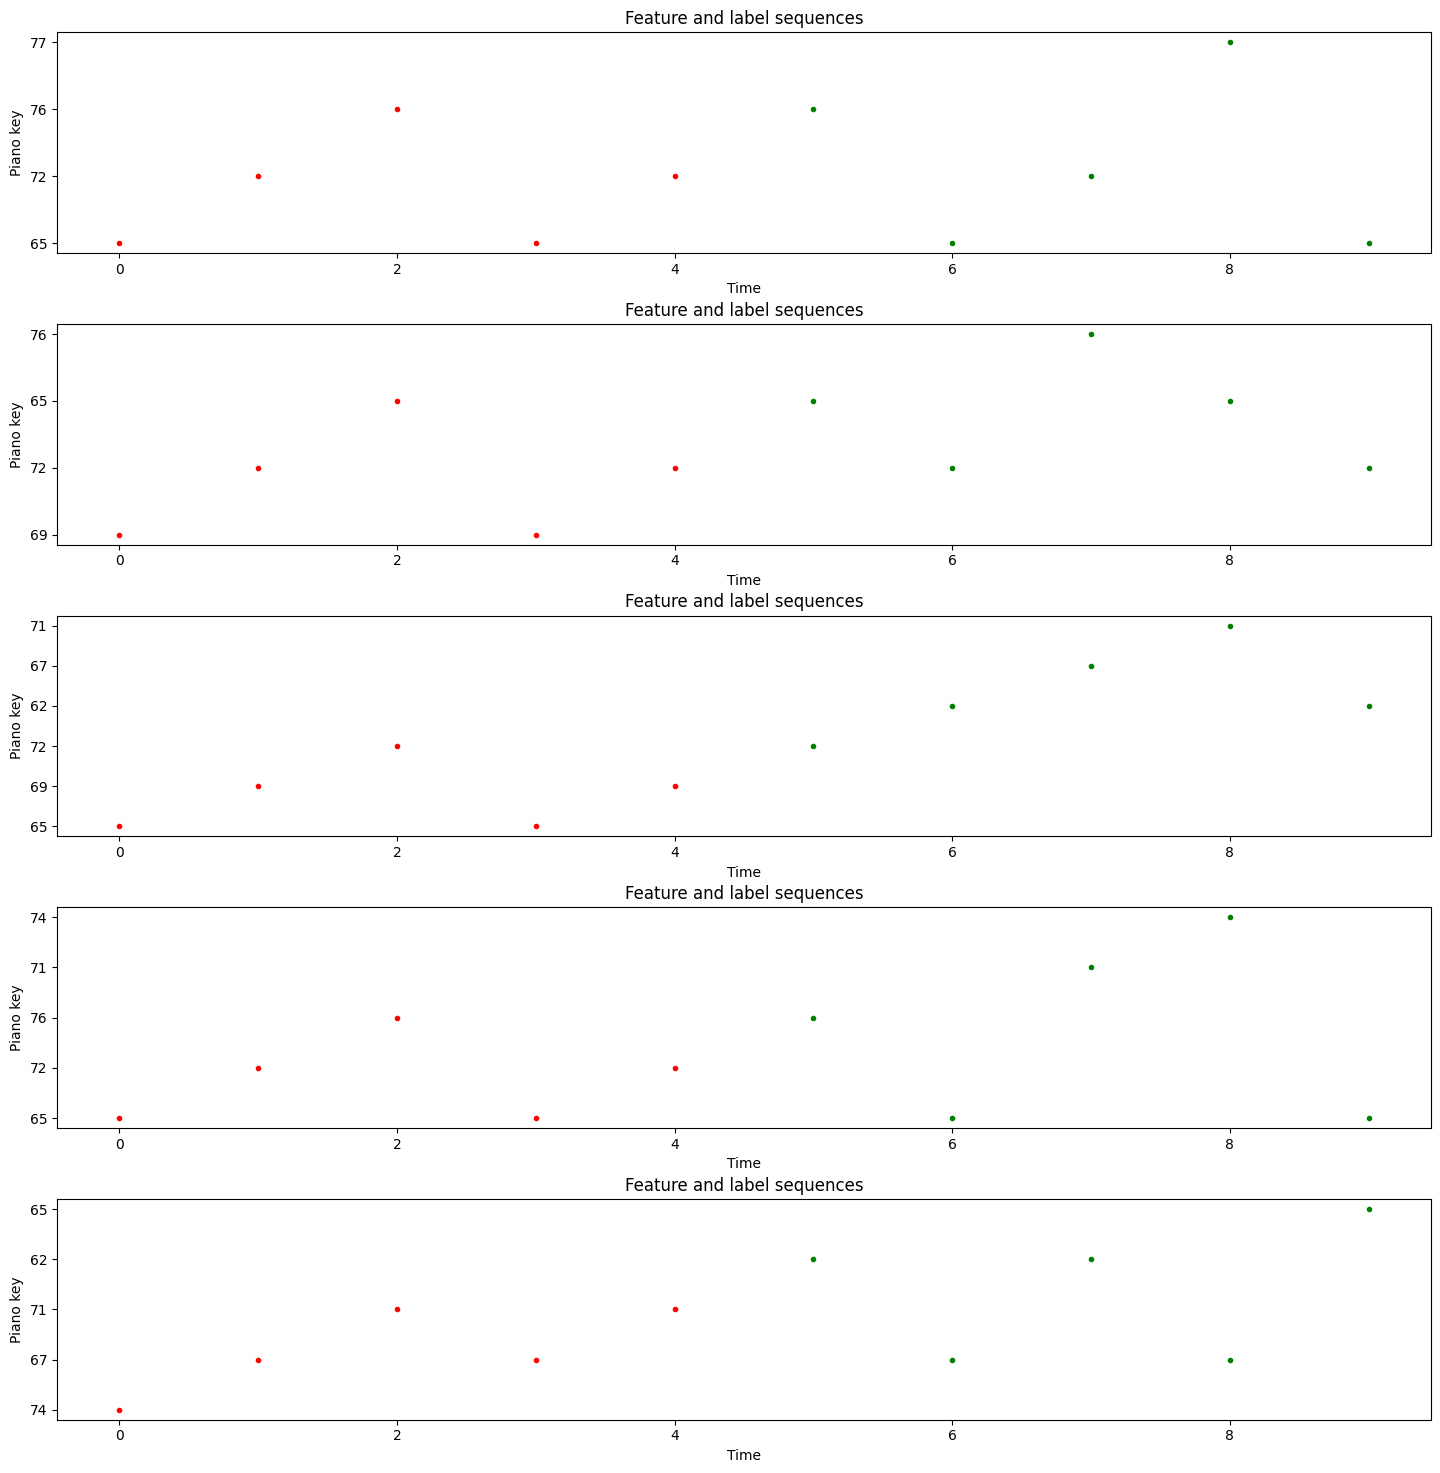

In [34]:
# Plot some sequences from the data using matplotlib

import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 10))

# Set the number of sequences to plot
num_sequences_to_plot = 5

# Read in the csv into a dataframe where the strings are converted into lists of integers
data = pd.read_csv("test.csv", converters={"feature": lambda x: x.strip("[]").split(", "), "label": lambda x: x.strip("[]").split(", ")})

# Plot the first 5 sequences
x1 = range(0, 5)
x2 = range(5, 10)
y1 = data['feature'][0:5]
y2 = data['label'][0:5]


# Create 5 plots horizontally
fig, axs = plt.subplots(5, 1, figsize=(15, 15))
# Add some padding between the plots
fig.tight_layout(pad=3.0)

for i in range(num_sequences_to_plot):
    # Draw two lines in red and green for the feature and label. Draw the label as a continuation of the feature
    # Plot as points
    axs[i].plot(x1, y1[i], 'r.', x2, y2[i], 'g.')
    axs[i].set_ylabel('Piano key')
    axs[i].set_xlabel('Time')
    axs[i].set_title('Feature and label sequences')
